# Avaliador de Ações




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from dotenv import dotenv_values
from os import system
from os.path import abspath

envVals = dotenv_values('.env')

def despine(ax):
  # Hiding spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # Setting
  ax.yaxis.set_ticks_position('left')
  ax.xaxis.set_ticks_position('bottom')


In [3]:
# Fazendo busca dos dados do ticker

system(f"node ./scripts/getData.js {envVals['TICKER']}")

0

In [4]:
# Abrindo indicadores em um DataFrame
dataPath = abspath('./data') + '/' + envVals['TICKER'] + '.json'
indicadoresDf = pd.read_json(dataPath)

# Abrindo histórico de cotações da ação em um segundo DataFrame
yahooTicker = envVals['TICKER'] + '.SA'

tk = yf.Ticker(yahooTicker)
tickerDf = tk.history('5y')


## Histórico de Indicadores Fundamentalistas

Os gráficos à seguir tem a intenção de detalhar o histórico de alguns indicadores fundamentalistas referentes ao Ticker em análise. (P/L, DY, VPA, P/VP) 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


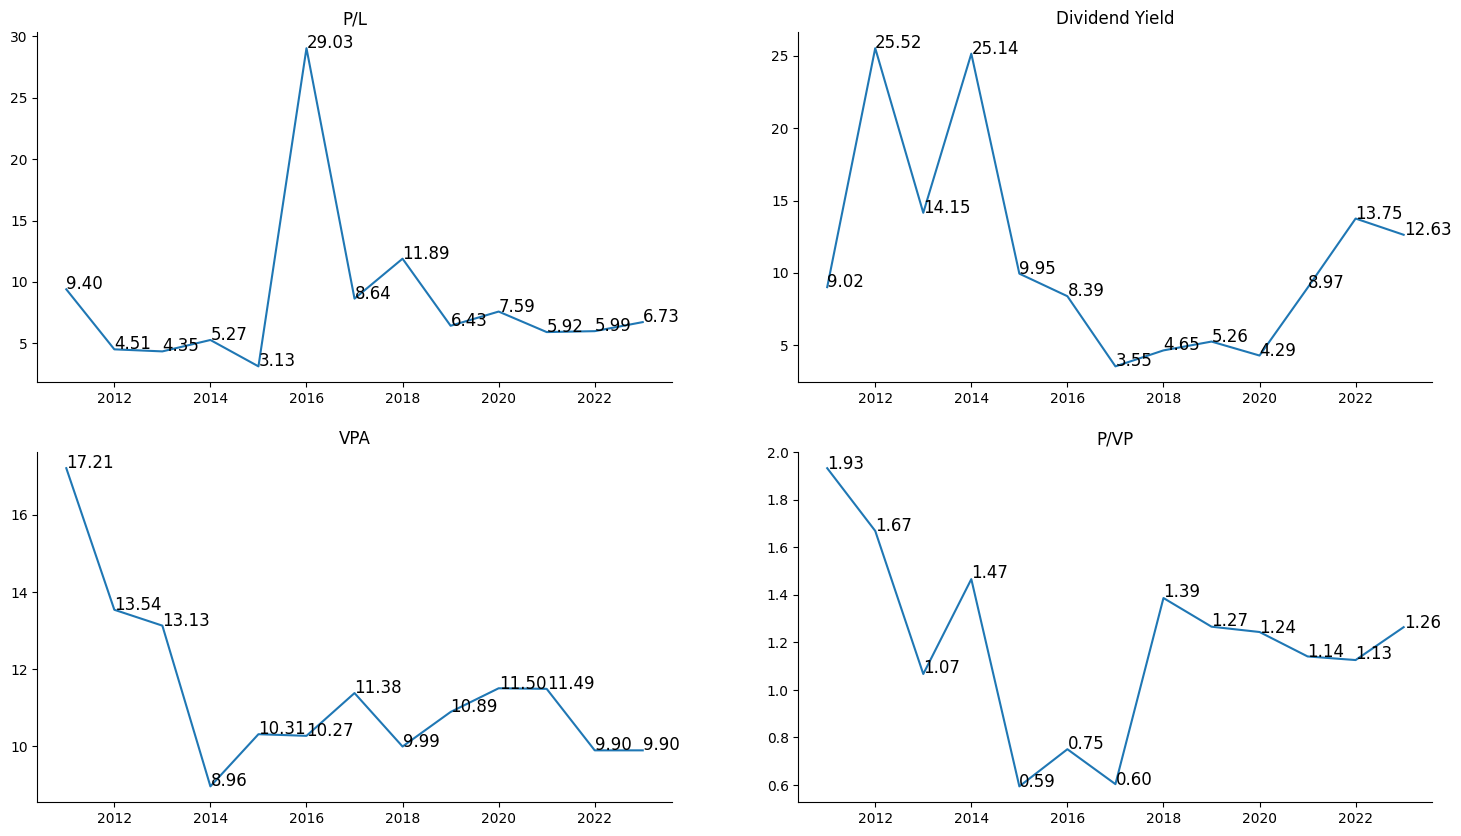

In [17]:
valores = [pd.DataFrame(indicadoresDf['P/L']['series']), pd.DataFrame(indicadoresDf['Dividend Yield']['series']),pd.DataFrame(indicadoresDf['VPA']['series']), pd.DataFrame(indicadoresDf['P/VP']['series'])]

indexes = ['P/L', 'Dividend Yield', 'VPA', 'P/VP']

fig, vax = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(18)

for ax, data, name in zip(vax.flat, valores, indexes):
    
    despine(ax)
    ax.set_title(f'{name}')
    ax.plot(data['year'], data['value'])

    for i in range(len(data)):
        ax.text(data['year'][i], round(data['value'][i], 2), f'{data["value"][i]:.2f}' , size=12)


plt.show()

## Cálculo do valor pelo método de Graham

O método de Graham utiliza de dois indicadores fundamentalistas: $LPA$ e $VPA$, para realizar o cálculo do "Valor Justo" de uma ação, ou seja, o valor que ela deveria ter de acordo com seus indicadores fundamentalistas. O cálculo é realizado através da seguinte fórmula:

$$
\sqrt{22.5 * LPA * VPA}
$$

Além disso, é calculada também uma margem de segurança em relação ao preço ideal de uma ação, que é um decréscimo de 15-30% do valor ideal. O valor de margem de segurança é subjetivo, e deve variar de acordo com a empresa.

In [ ]:
graham = np.sqrt(22.5 * indicadoresDf['VPA']['currentValue'] * indicadoresDf['LPA']['currentValue'])
safetyMargin = graham - float(envVals['SAFETY']) * graham
safetypercent = float(envVals['SAFETY']) * 100

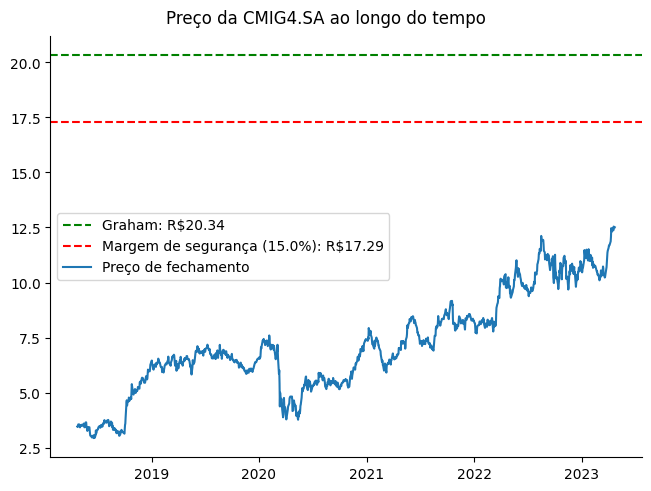

In [ ]:

fig, ax= plt.subplots(1, 1, constrained_layout =True)

# Plotando valor de Graham atual vs COtação
ax.axhline(y=graham, color='green', linestyle='dashed', label=f'Graham: R${graham:.2f}')
ax.axhline(y=safetyMargin, color='red', linestyle='dashed', label=f'Margem de segurança ({safetypercent}%): R${safetyMargin:.2f}')
ax.plot(tickerDf['Close'], label='Preço de fechamento')

despine(ax)

fig.suptitle(f"Preço da {yahooTicker} ao longo do tempo")

ax.legend()